In [1]:
#%cd "D:\Neural\neural-networks-and-deep-learning"

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Dropout, Flatten, MaxPooling2D

import matplotlib.pyplot as plt
import numpy as np

from tensorflow.python.keras.datasets import mnist

%matplotlib inline

# training_data, validation_data, test_data = mnist_loader.load_data()
training_data, test_data = mnist.load_data()

training_data = list(training_data)
test_data = list(test_data)

#training_data[0] = np.concatenate((training_data[0], validation_data[0]))
#training_data[1] = np.concatenate((training_data[1], validation_data[1]))

training_data[0] = training_data[0].reshape(training_data[0].shape[0], 28, 28, 1)
test_data[0] = test_data[0].reshape(test_data[0].shape[0], 28, 28, 1)

# Create a Sequential Model and adding the layers
model = Sequential()

model.add(Conv2D(28, kernel_size=(3,3), input_shape=(28, 28, 1)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten()) # Flattening the 2D arrays for fully connected layers
model.add(Dense(128, activation=tf.nn.relu))
model.add(Dropout(0.2))
model.add(Dense(10,activation=tf.nn.softmax))

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

model.summary()

model = tf.keras.models.load_model("models/model.h5")

def plot_image(i, predictions_array, true_label, img):
  predictions_array, true_label, img = predictions_array[i], true_label[i], img[i].reshape(28, 28)
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  
  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'
  
  plt.xlabel("{} {:2.0f}% ({})".format(predicted_label,
                                100*np.max(predictions_array),
                                true_label),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array[i], true_label[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1]) 
  predicted_label = np.argmax(predictions_array)
 
  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')
    
def plot(i, predictions_array, img):
    plt.figure(figsize=(7,3))
    
    plt.subplot(1,2,1)
    
    predictions_array, img = predictions_array[i], img[i].reshape(28, 28)
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(img, cmap=plt.cm.binary)
    
    predicted_label = np.argmax(predictions_array)
    plt.xlabel("{} {:2.0f}%".format(predicted_label, 100 * np.max(predictions_array)), color='blue')

    plt.subplot(1,2,2)
    
    plt.grid(False)
    plt.xticks([r for r in range(10)], map(str, range(0, 10)))
    plt.yticks([])
    thisplot = plt.bar(range(10), predictions_array, color="#777777")
    plt.ylim([0, 1]) 
    predicted_label = np.argmax(predictions_array)
    thisplot[predicted_label].set_color('blue')
    

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 28)        280       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 28)        0         
_________________________________________________________________
flatten (Flatten)            (None, 4732)              0         
_________________________________________________________________
dense (Dense)                (None, 128)               605824    
_________________________________________________________________
dropout (Dropout)            (None, 128)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1290      
Total params: 607,394
Trainable params: 607,394
Non-trainable params: 0
__________________________________________________

In [2]:
from tkinter import *
import time
from PIL import Image, ImageDraw
import matplotlib
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
from matplotlib.backends.backend_tkagg import FigureCanvasTkAgg, NavigationToolbar2Tk
import numpy as np

class App_Window(Tk):
    def __init__(self, parent = None, model = None):
        Tk.__init__(self, parent)
        self.parent = parent
        self.model = model
        self.initialize()
        
    def initialize(self):        
        self.draw()
        
    def draw(self, CanvasWidth = 400):
        self.width = CanvasWidth
        self.white = (255, 255, 255)
        
        self.fig, (self.ax1, self.ax2, self.ax3) = plt.subplots(1, 3, figsize=(15,5))
        self.canvas = FigureCanvasTkAgg(self.fig, self)
        
        self.canvas.draw()
        
        b1 = "up"
        xold, yold = None, None    

        def b1down(event):
            nonlocal b1
            b1 = "down"           

        def b1up(event):
            nonlocal b1, xold, yold
            b1 = "up"
            xold = None
            yold = None
            
        def motion(event):
                if b1 == "down":
                    nonlocal xold, yold
                    if xold is not None and yold is not None:
                        event.widget.create_oval(xold, yold, event.x, event.y, fill="black", width=5)
                        self.draw.line([xold, yold, event.x, event.y],fill="black",width=5)
                    xold = event.x
                    yold = event.y
        
        self.drawing_area = Canvas(self, width=self.width, height=self.width)
        self.image1 = Image.new("RGB", (self.width, self.width), self.white)
        self.draw = ImageDraw.Draw(self.image1)
        self.drawing_area.pack()
        self.drawing_area.bind("<Motion>", motion)
        self.drawing_area.bind("<ButtonPress-1>", b1down)
        self.drawing_area.bind("<ButtonRelease-1>", b1up)
        
        Button(self, text='Classify!', command=self.OnButtonClick).pack()
        
    def refreshFigure(self,x,y):
        self.line1.set_xdata(x)
        self.line1.set_ydata(y)
        self.canvas.draw()
        
    def OnButtonClick(self):
        filename = "4my_drawing.bmp"
        #image1.save(filename)
        II=np.asarray(self.image1)
        II=np.apply_along_axis(np.min,2,II)

        data=np.asarray([[i,j] for i in range(self.width) for j in range(self.width) if II[j,i]==0]).astype('float64')
        datax=data[:,0]
        datay=data[:,1]
        
        # centre and scale the pixels
        datax -= np.mean(datax)
        datay -= np.mean(datay)
        scaling = np.max(np.abs([datax.min(),datax.max(),datay.min(),datay.max()]))
        datax *= 1/scaling
        datay *= 1/scaling
      
        posn = np.linspace(-1.2,1.2, 28)
        sx = -0.5*(1/0.06)**2
        def kde(x,y):
            return(np.min([np.sum(np.exp(sx*((x-datax)**2+(y-datay)**2))),5]))

        output=np.asarray([[kde(x,y) for x in posn] for y in posn])
        output=output/output.max()
        output1=np.asarray([[[ [output[j,i]] for i in np.arange(28)] for j in np.arange(28)]])
        DrawnOutMatrix=output1[0,:,:,0]
        
        self.drawing_area.delete("all")
        self.draw.rectangle((0, 0, self.width, self.width), fill=self.white)
        self.ax3.clear()
        
        if self.model:
            predict = self.model.predict_proba(output1)[0]
            
            self.ax1.imshow(255-II,cmap='Greys')

            def PlotMnist(inn,ax):
                ax.imshow(inn[0,:,:,0],cmap='Greys')

            #PlotMnist(output1, self.ax2)
            
            self.ax2.grid(False)
            self.ax2.set_xticks([])
            self.ax2.set_yticks([])
            self.ax2.imshow(output1.reshape(28, 28), cmap=plt.cm.binary)
            
            predicted_label = np.argmax(predict)
            self.ax2.set_xlabel("{} {:2.0f}%".format(predicted_label, 100 * np.max(predict)), color='blue')
            
            #self.ax3.bar(np.arange(10),p,0.8,color='g')
            
            self.ax3.grid(False)
            self.ax3.set_xticks([r for r in range(10)])
            self.ax3.set_xticklabels(map(str, range(0, 10)))
            self.ax3.set_yticks([])
            thisplot = self.ax3.bar(range(10), predict, color="#777777")
            self.ax3.set_ylim([0, 1]) 
            predicted_label = np.argmax(predict)
            thisplot[predicted_label].set_color('blue')
            
            self.canvas.draw()
            self.canvas.get_tk_widget().pack(side=TOP, fill=BOTH, expand=1)
        

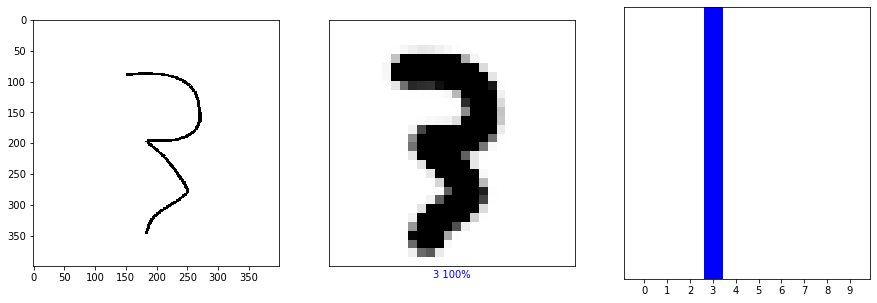

In [3]:
MainWindow = App_Window(model = model)
MainWindow.mainloop()

In [ ]:
from tkinter import *
import time
from PIL import Image, ImageDraw
import matplotlib
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
from matplotlib.backends.backend_tkagg import FigureCanvasTkAgg, NavigationToolbar2Tk
import numpy as np

# This function takes 2 arguments, 
#   - an optional keras model,
#   - Canvas Width allows user to set the pixel height and width of the drawing box
#
#  The function returns a 28*28 matrix of  pixel values made from the canvas drawing
#  if a keras model is also provided then the function will plot prediction results too

def DrawMyOwnNumbers(model=None,CanvasWidth=200):
    DrawnOutMatrix=0
    width=CanvasWidth
    white = (255, 255, 255)
    black = (0, 0, 0)

    b1 = "up"
    xold, yold = None, None    

    def b1down(event):
        nonlocal b1
        b1 = "down"           

    def b1up(event):
        nonlocal b1, xold, yold
        b1 = "up"
        xold = None
        yold = None
    def motion(event):
            if b1 == "down":
                nonlocal xold, yold
                if xold is not None and yold is not None:
                    event.widget.create_oval(xold, yold, event.x, event.y, fill="black",width=5)
                    draw.line([xold, yold, event.x, event.y],fill="black",width=5)
                xold = event.x
                yold = event.y
    root = Tk()

    drawing_area = Canvas(root,width=width,height=width)
    image1 = Image.new("RGB", (width, width), white)
    draw = ImageDraw.Draw(image1)
    drawing_area.pack()
    drawing_area.bind("<Motion>", motion)
    drawing_area.bind("<ButtonPress-1>", b1down)
    drawing_area.bind("<ButtonRelease-1>", b1up)
    
    def handle_click():
        nonlocal DrawnOutMatrix
        nonlocal root
        root.destroy()
        %matplotlib inline


        filename = "4my_drawing.bmp"
        #image1.save(filename)
        II=np.asarray(image1)
        II=np.apply_along_axis(np.min,2,II)
        

        data=np.asarray([[i,j] for i in range(width) for j in range(width) if II[j,i]==0]).astype('float64')
        datax=data[:,0]
        datay=data[:,1]
        
        # centre and scale the pixels
        datax -= np.mean(datax)
        datay -= np.mean(datay)
        scaling = np.max(np.abs([datax.min(),datax.max(),datay.min(),datay.max()]))
        datax *= 1/scaling
        datay *= 1/scaling
      
        posn = np.linspace(-1.2,1.2, 28)
        sx = -0.5*(1/0.06)**2
        def kde(x,y):
            return(np.min([np.sum(np.exp(sx*((x-datax)**2+(y-datay)**2))),5]))

        output=np.asarray([[kde(x,y) for x in posn] for y in posn])
        output=output/output.max()
        output1=np.asarray([[[ [output[j,i]] for i in np.arange(28)] for j in np.arange(28)]])
        DrawnOutMatrix=output1[0,:,:,0]
        
        if model:
            p = model.predict_proba(output1)[0]

            f, (ax1, ax2, ax3) = plt.subplots(1, 3,figsize=(15,5))
            
            ax1.imshow(255-II,cmap='Greys')

            def PlotMnist(inn,ax):
                ax.imshow(inn[0,:,:,0],cmap='Greys')

            PlotMnist(output1, ax2)
            ax3.bar(np.arange(10),p,0.8,color='g')


    Button(root, text='classify!', command=handle_click).pack()
    root.mainloop()
    return DrawnOutMatrix

image = DrawMyOwnNumbers(model)
image.astype("float32")
data = image.reshape(1, 28, 28, 1)

predict_input_fn = tf.estimator.inputs.numpy_input_fn(
    x = {"x": data[0].reshape(data.shape[0], 28, 28)},
    y = None,
    num_epochs=1,
    shuffle=False)

predictions = model.predict(data)
#predictions = list(mnist_classifier.predict(input_fn=predict_input_fn))

#plt.imshow(image, cmap=plt.cm.Greys)
plot(0, predictions, data)

